# Library

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,confusion_matrix


In [45]:
# Loading dataset
df = pd.read_csv("C:/DBS study/Project/CA1/B9DA109_2425/Group_5_Cancer_Data.csv")

In [46]:
# check for rows and columns
df.shape

(569, 33)

In [47]:
# Checking few rows
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [48]:
# identifying missing value and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [49]:
# checking for data distributions
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [50]:
#checking sum of null values and aobserve there is one colunm of null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [51]:
# drop the colunm ['Unnamed: 32','id'] 
df.drop(columns=['Unnamed: 32','id'],axis=1,inplace=True)

In [52]:
df_new = pd.get_dummies(df, dtype=int)
df_new.shape

(569, 32)

diagnosis_M
0    357
1    212
Name: count, dtype: int64


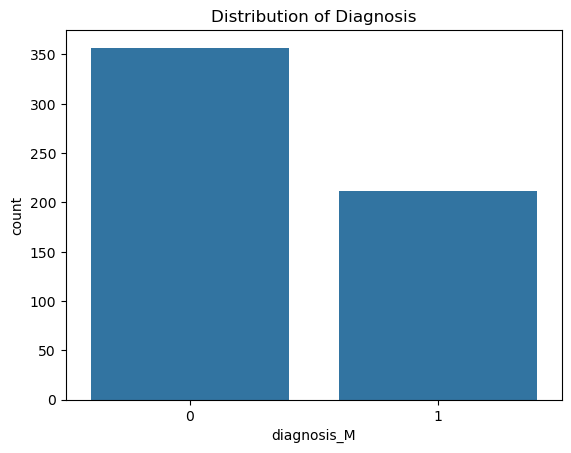

In [53]:
#Checked the count of diagnosis  
print(df_new['diagnosis_M'].value_counts())
sns.countplot(x='diagnosis_M', data=df_new)
plt.title('Distribution of Diagnosis')
plt.show()


# Boxplot to check outliers

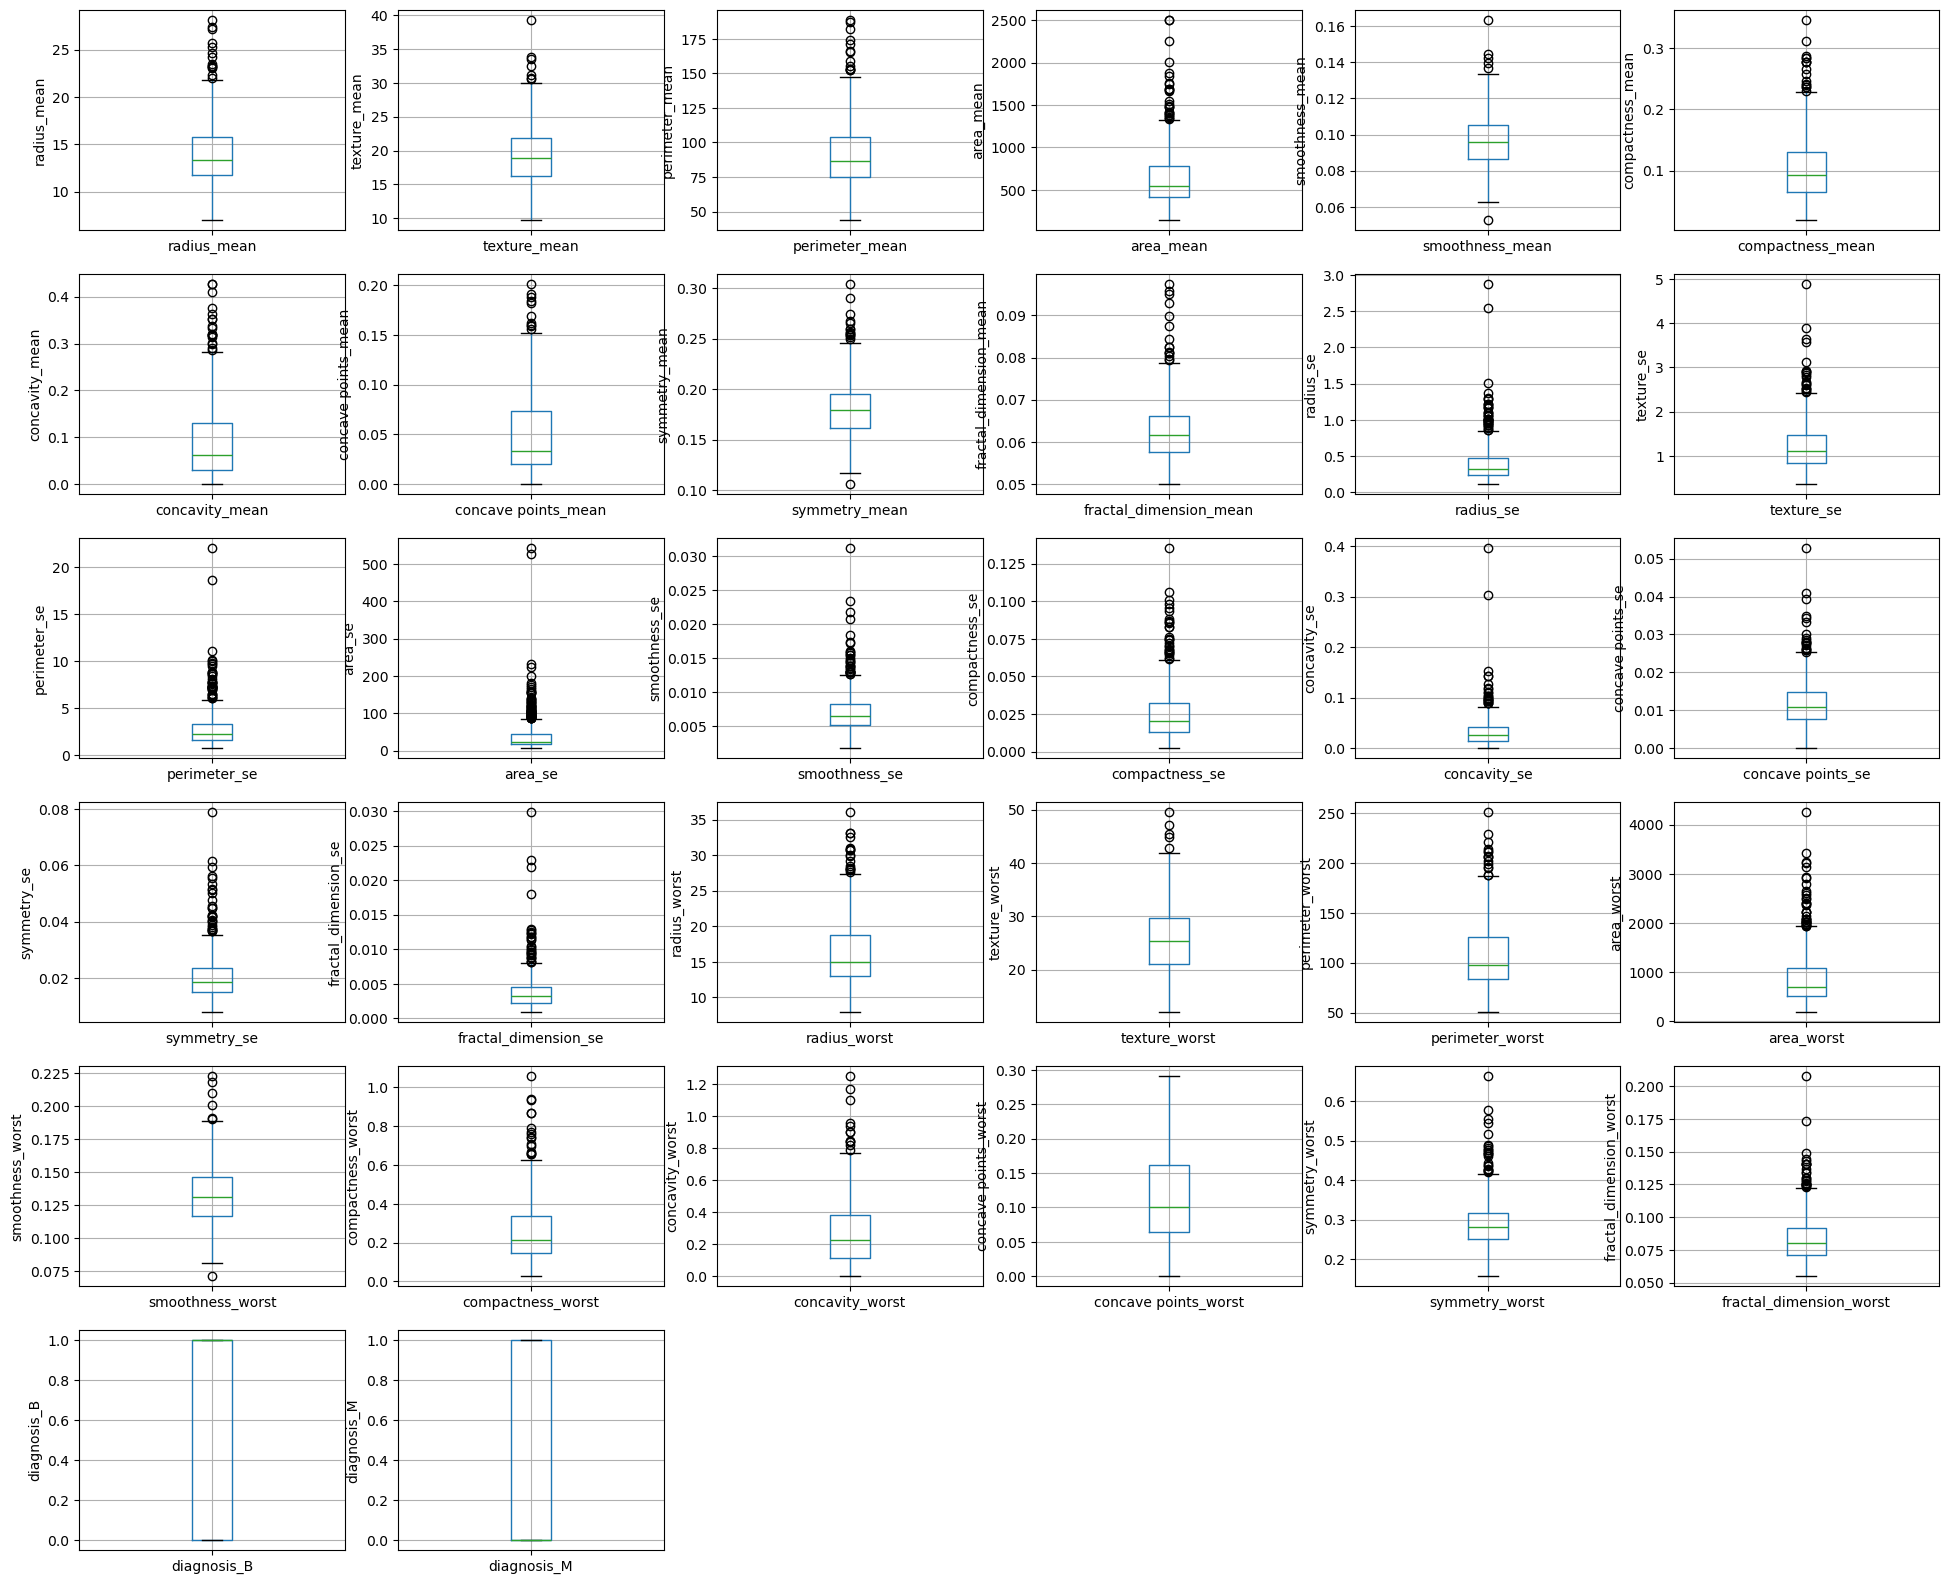

In [54]:
plt.figure(figsize=(24, 20))


for j, i in enumerate(df_new.columns,1):
    plt.subplot(6, 6, j)
    df_new.boxplot(column=[i])
    plt.title('')
    plt.ylabel(i)


# Removed outlier using Boxplot

In [55]:
for i in df_new.columns:
    Q1,Q3 =  np.percentile(df_new[i],[25,75])
    IQR = Q3-Q1
    Lower_fence = Q1 - (1.5*IQR)
    Upper_fence = Q3 + (1.5*IQR)
    print(i)
    print("Lower bound :", Lower_fence,"Upper bound :",  Upper_fence)
    df_new.loc[df_new[i] < Lower_fence,i] = Lower_fence
    df_new.loc[df_new[i] > Upper_fence,i] = Upper_fence

radius_mean
Lower bound : 5.579999999999999 Upper bound : 21.9
texture_mean
Lower bound : 7.725000000000003 Upper bound : 30.244999999999997
perimeter_mean
Lower bound : 31.775000000000013 Upper bound : 147.49499999999998
area_mean
Lower bound : -123.30000000000001 Upper bound : 1326.3000000000002
smoothness_mean
Lower bound : 0.057975 Upper bound : 0.133695
compactness_mean
Lower bound : -0.03329999999999997 Upper bound : 0.22861999999999996
concavity_mean
Lower bound : -0.12215000000000001 Upper bound : 0.28241000000000005
concave points_mean
Lower bound : -0.060224999999999994 Upper bound : 0.15453499999999998
symmetry_mean
Lower bound : 0.11119999999999995 Upper bound : 0.24640000000000006
fractal_dimension_mean
Lower bound : 0.045070000000000006 Upper bound : 0.07874999999999999
radius_se
Lower bound : -0.13735000000000003 Upper bound : 0.84865
texture_se
Lower bound : -0.12625000000000008 Upper bound : 2.43415
perimeter_se
Lower bound : -1.0205 Upper bound : 5.9835
area_se
Lower 

C:\Users\piyus\AppData\Local\Temp\ipykernel_13748\3631525169.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_new.loc[df_new[i] < Lower_fence,i] = Lower_fence
C:\Users\piyus\AppData\Local\Temp\ipykernel_13748\3631525169.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_new.loc[df_new[i] < Lower_fence,i] = Lower_fence


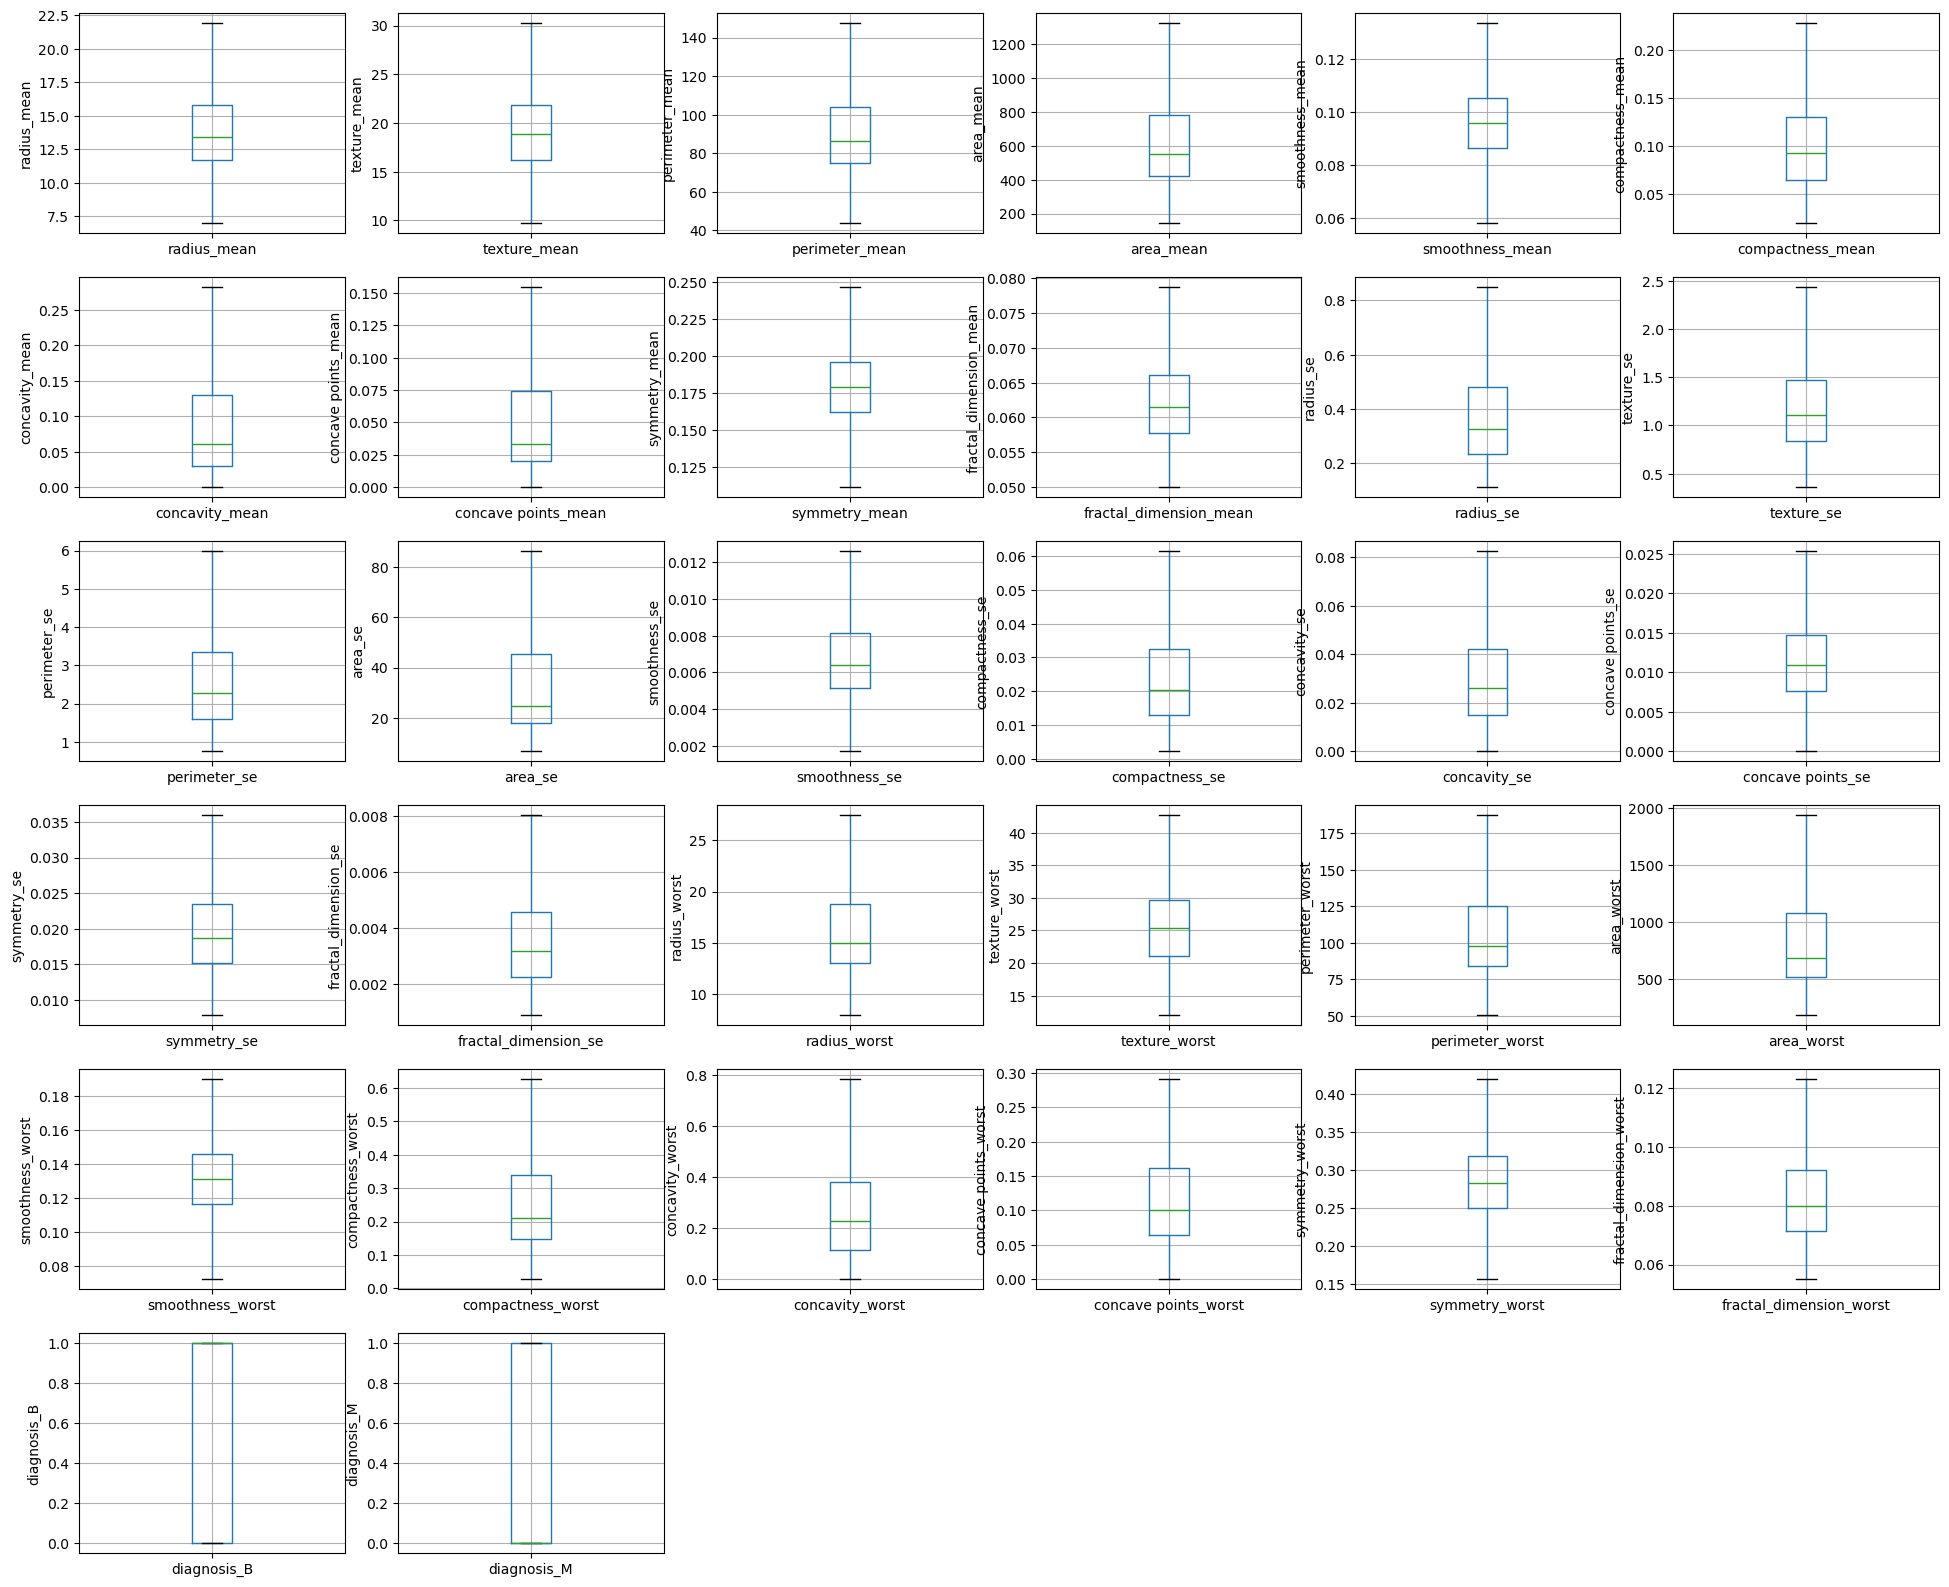

In [56]:
plt.figure(figsize=(24, 20))


for j, i in enumerate(df_new.columns,1):
    plt.subplot(6, 6, j)
    df_new.boxplot(column=[i])
    plt.title('')
    plt.ylabel(i)

<Axes: >

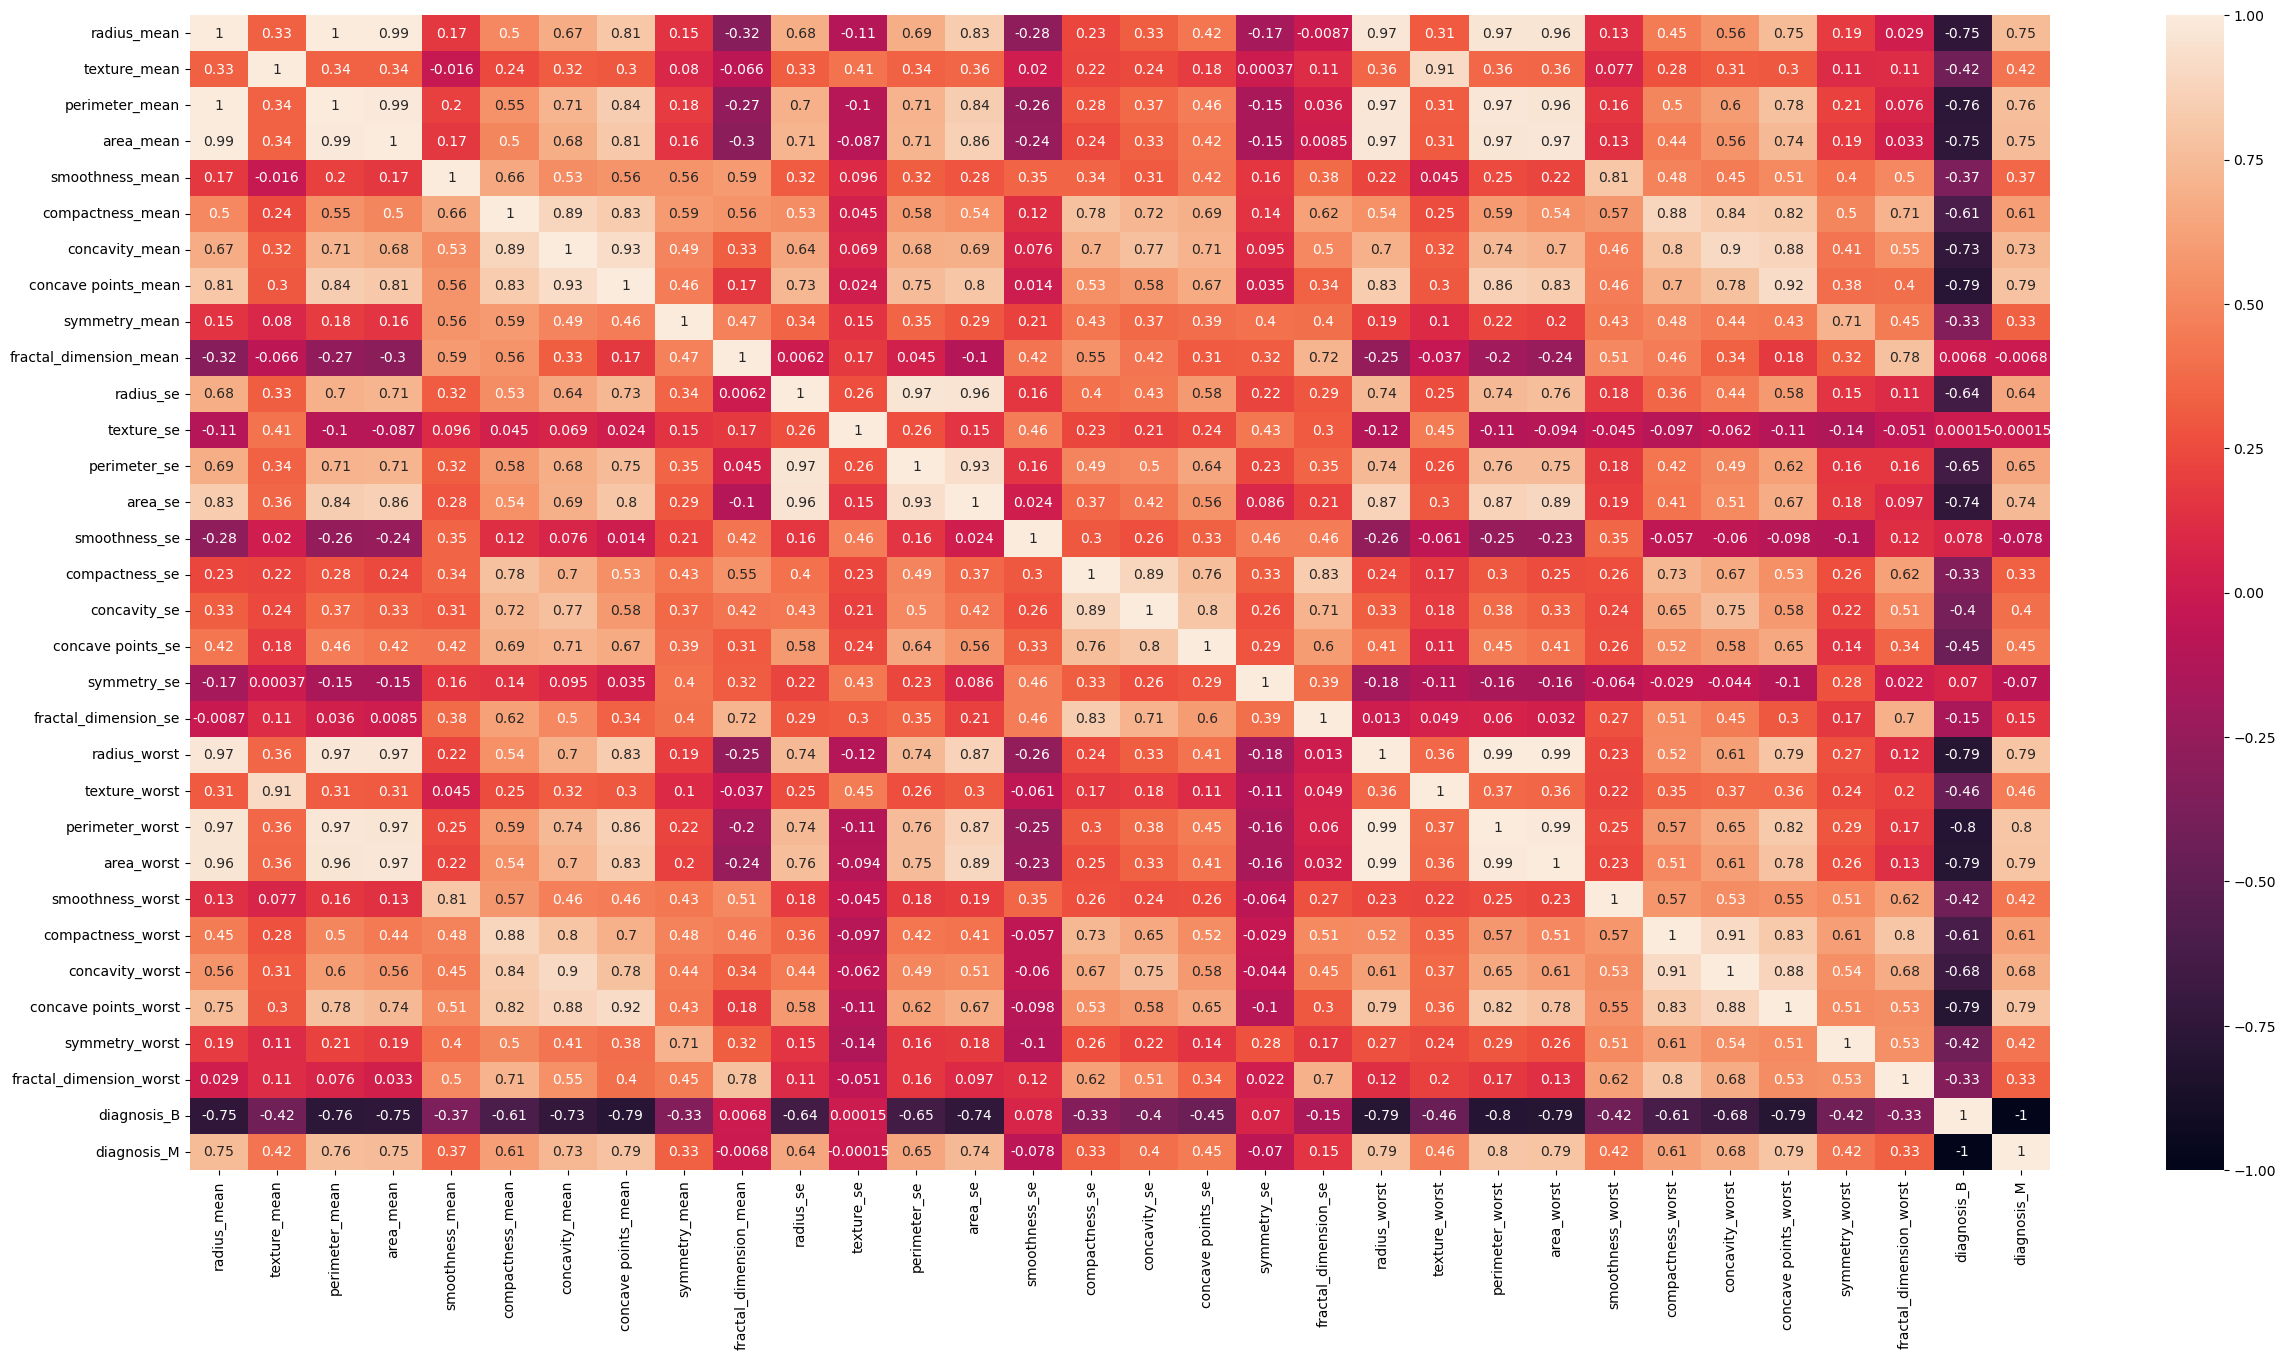

In [57]:
fig, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(df_new.corr(),annot=True)

In [58]:
# Kept threshold as 0.9 for coreellation and drop the variables who has greater corelation value more then 0.90 from the data frame.

df_new.drop(columns=['diagnosis_B','perimeter_mean','area_mean','radius_worst','perimeter_worst','area_worst','concavity_mean','perimeter_se','radius_se','texture_worst','concave points_worst','concavity_worst'],axis=1,inplace=True)
df_new.shape

(569, 20)

<Axes: >

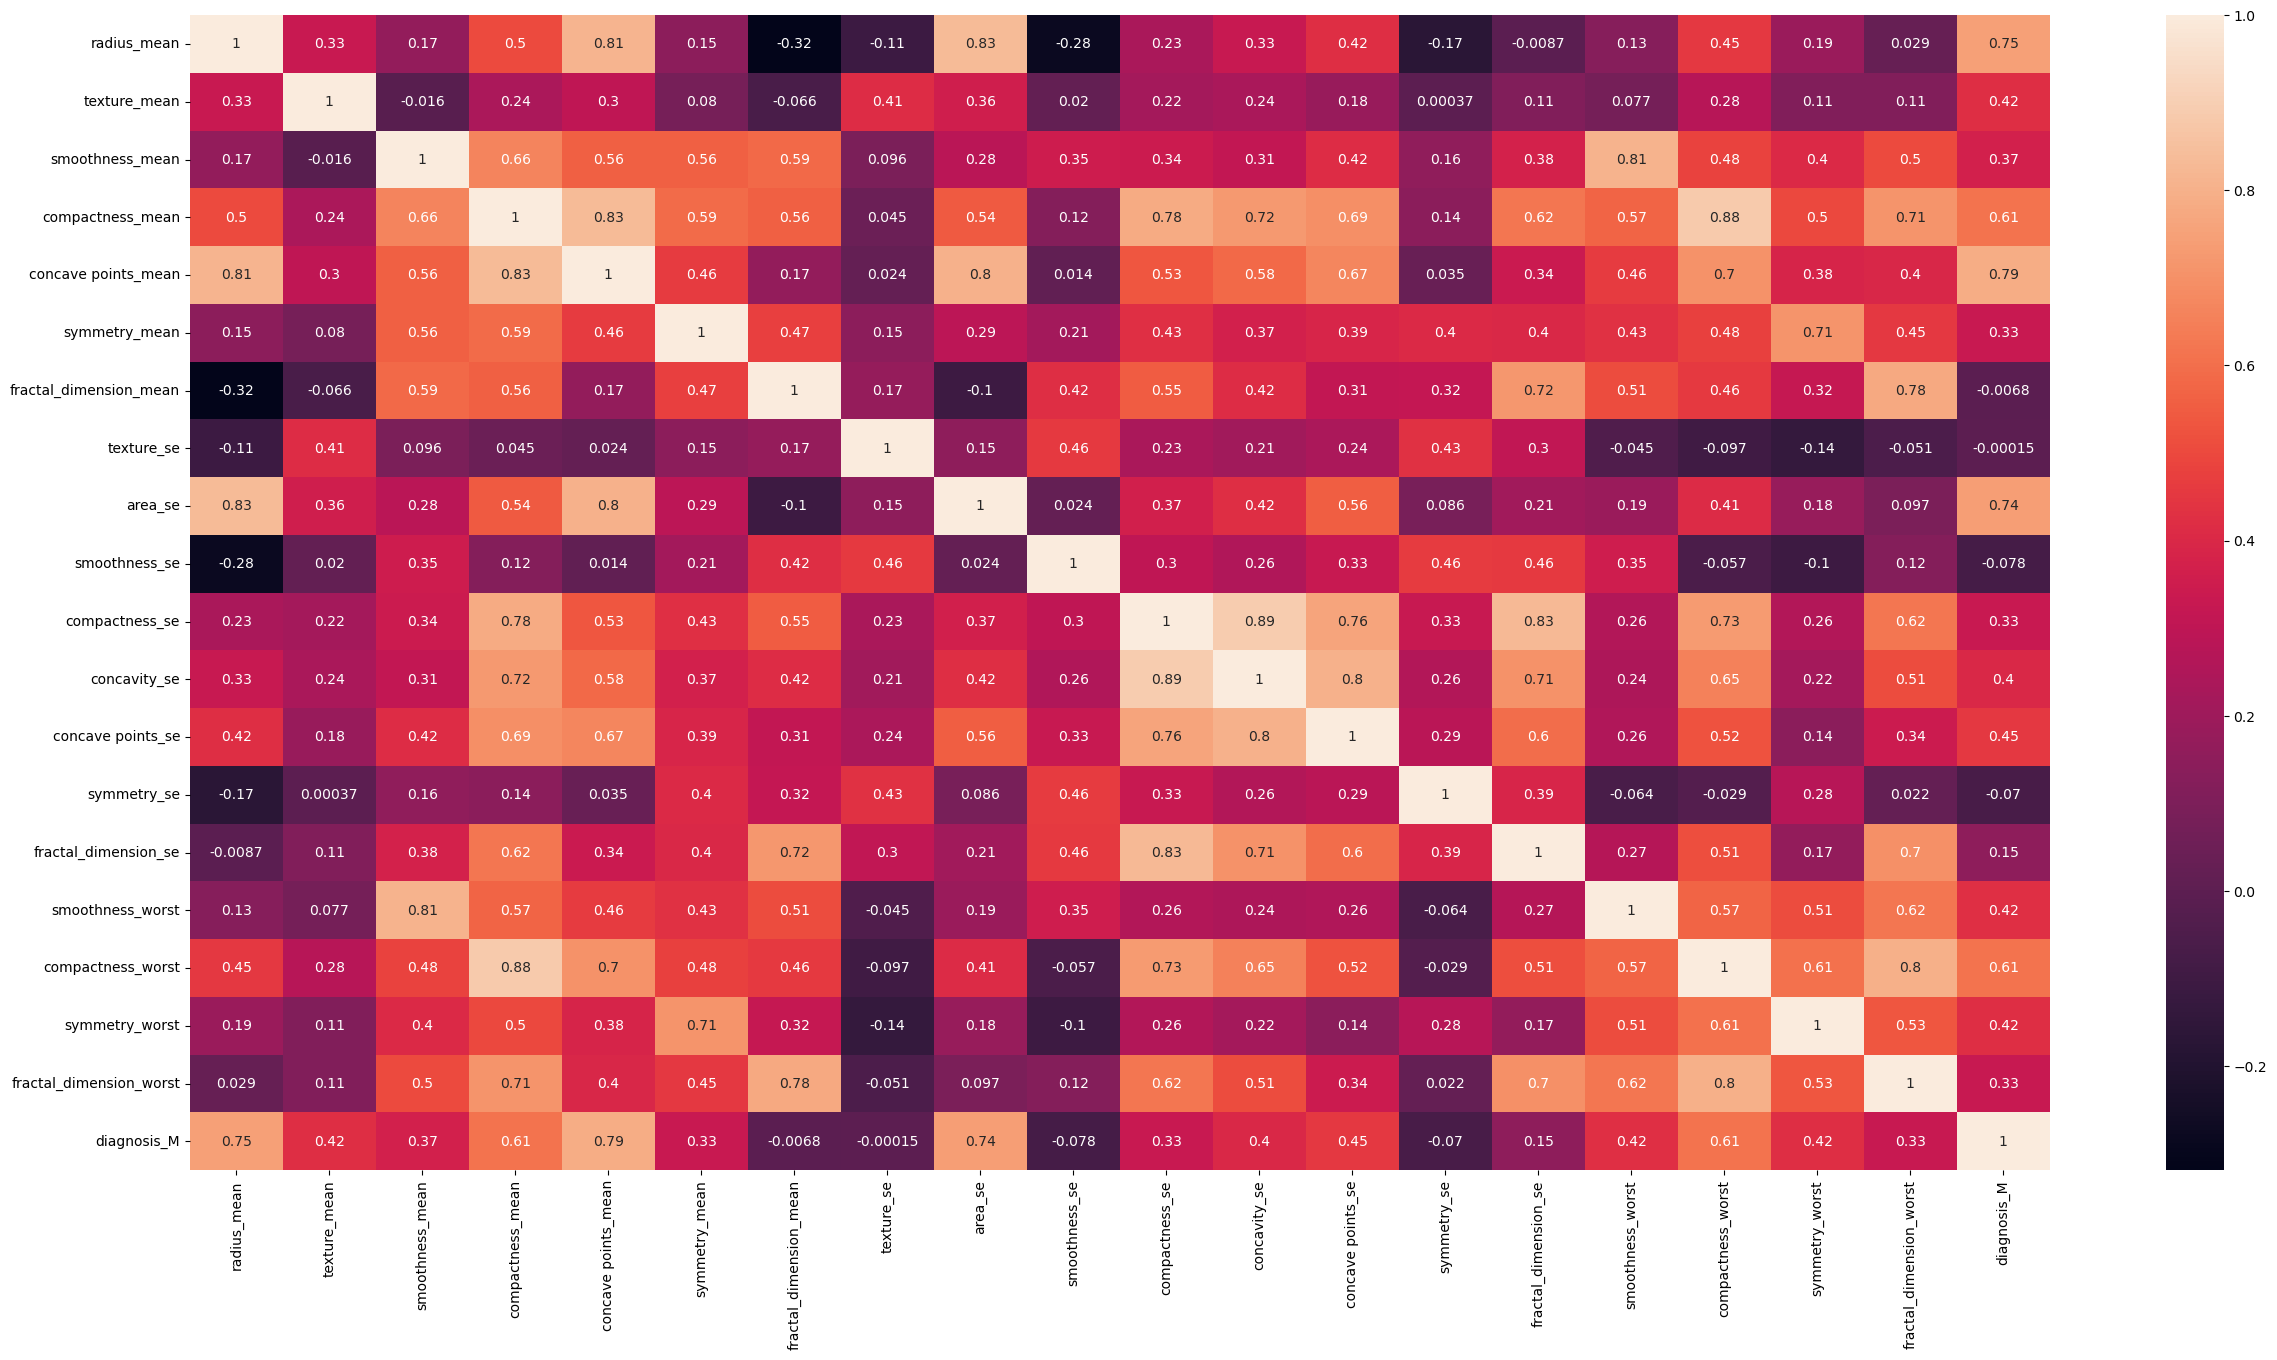

In [59]:
#Keep as 0.9 thresholds for removal corelated variables
fig, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(df_new.corr(),annot=True)

In [60]:
#Seprate the target variable
X = df_new.drop(columns=['diagnosis_M'])
y = df_new['diagnosis_M']


In [61]:
#Distribute the data in for test it's 30% and for train it's 70% and the random_state we have kept 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardization scalling

In [62]:
#We have use standardization metthod where μ = 0 and sd = 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM Modelling

In [63]:
# if we neeed to manually we can use belpow comment program and comment below part
#SVM model 'linear', 'poly', 'rbf', 'sigmoid'
#svm_model = svm.SVC(kernel='sigmoid',C=100)
#svm_model.fit(X_train, y_train)
#y_pred = svm_model.predict(X_test)

SVM = svm.SVC()

param_grid = {
    'kernel' : ["poly","linear","rbf","sigmoid"],
    'C' : [1,10,100]
    }

grid_search = GridSearchCV(estimator=SVM,param_grid=param_grid,cv=6,n_jobs=-1,verbose=2)

grid_search.fit(X_train,y_train)

print(f'Best parameters : {grid_search.best_params_}')

SVM_model = grid_search.best_estimator_
y_pred = SVM_model.predict(X_test)

Fitting 6 folds for each of 12 candidates, totalling 72 fits
Best parameters : {'C': 10, 'kernel': 'rbf'}


Accuracy of SVM model on test set : 0.98
Recall of SVM model on test set : 0.97
precision score of SVM model on test set : 0.97
f1 score of SVM model on test set : 0.97


Text(0.5, 14.722222222222216, 'Predicted label')

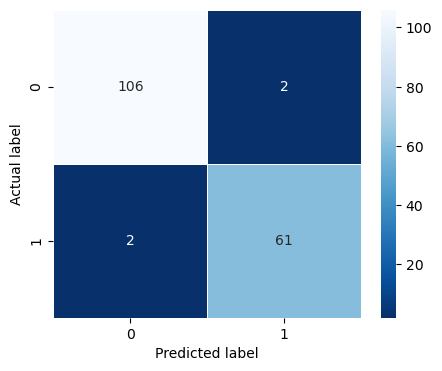

In [64]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy of SVM model on test set : {accuracy :.2f}')
print(f'Recall of SVM model on test set : {recall :.2f}')
print(f'precision score of SVM model on test set : {precision :.2f}')
print(f'f1 score of SVM model on test set : {f1 :.2f}')

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_mat,annot=True,fmt="d",linewidths=.5,square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


# Decision Tree Classification

In [ ]:
#Decision tree = entropy,gini
#Dec_tree_model = DecisionTreeClassifier(criterion='gini')
#Dec_tree_model.fit(X_train, y_train)
#y_pred = Dec_tree_model.predict(X_test)


Dec_tree = DecisionTreeClassifier(random_state=70)

param_grid = {
    'criterion': ['gini','entropy']
    }

grid_search = GridSearchCV(estimator=Dec_tree,param_grid=param_grid,cv=6,n_jobs=-1,verbose=2)

grid_search.fit(X_train,y_train)

print(f'Best parameters : {grid_search.best_params_}')

Dec_tree_model = grid_search.best_estimator_
y_pred = Dec_tree_model.predict(X_test)

Fitting 6 folds for each of 2 candidates, totalling 12 fits
Best parameters : {'criterion': 'gini'}


Accuracy of Decision tree on test set before pruning : 0.92
Recall of Decision tree on test set before pruning : 0.94
precision score of Decision tree on test set before pruning : 0.86
f1 score of Decision tree on test set before pruning : 0.89


Text(0.5, 14.722222222222216, 'Predicted label')

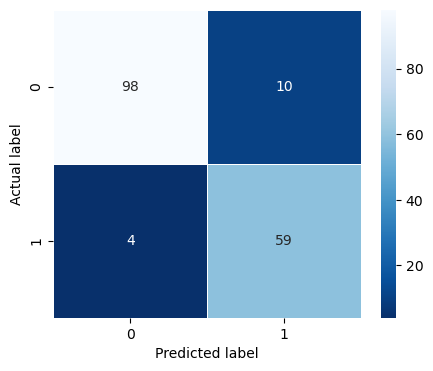

In [74]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy of Decision tree on test set before pruning : {accuracy :.2f}')
print(f'Recall of Decision tree on test set before pruning : {recall :.2f}')
print(f'precision score of Decision tree on test set before pruning : {precision :.2f}')
print(f'f1 score of Decision tree on test set before pruning : {f1 :.2f}')

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_mat,annot=True,fmt="d",linewidths=.5,square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


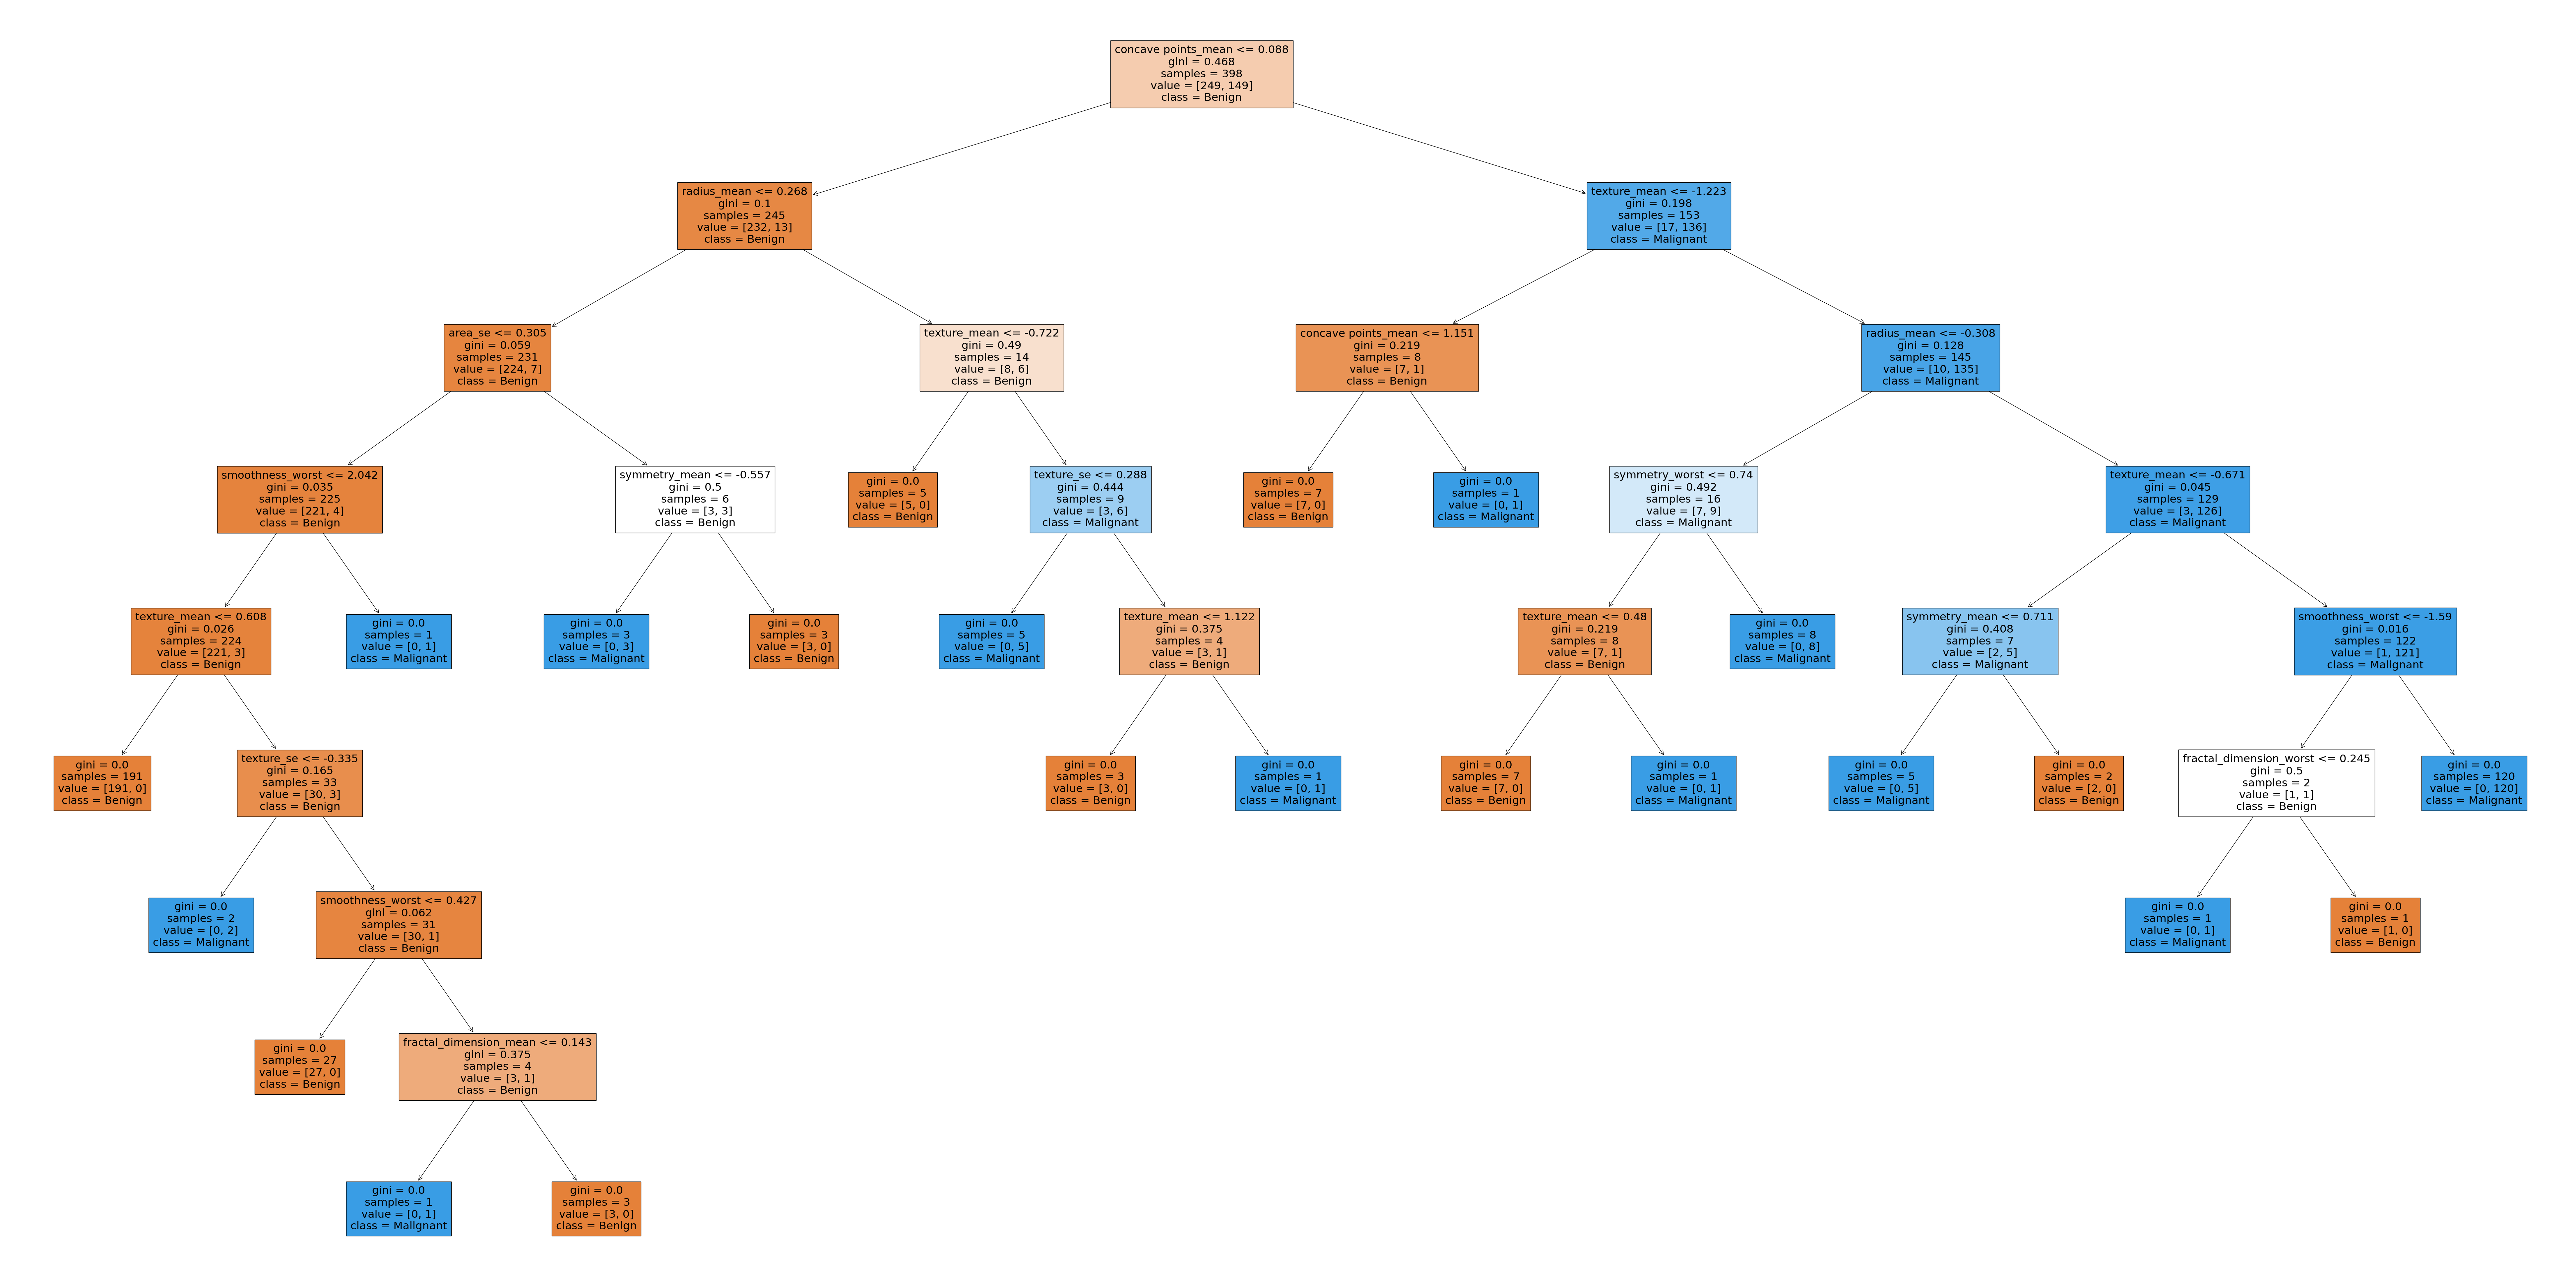

In [75]:
plt.figure(figsize=(100,50))
tree.plot_tree(Dec_tree_model,filled=True,feature_names=['radius_mean','texture_mean','smoothness_mean','compactness_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','texture_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','smoothness_worst','compactness_worst','symmetry_worst','fractal_dimension_worst','diagnosis_M'],class_names=['Benign','Malignant'])
plt.show()


In [ ]:
#Decision tree pruning

path = Dec_tree_model.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas


best_alpha = 0
best_accuracy = 0

for ccp_alpha in ccp_alphas:
    Dec_tree_model.set_params(ccp_alpha=ccp_alpha)
    Dec_tree_model.fit(X_train,y_train)
    
    y_pred = Dec_tree_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_alpha = ccp_alpha
        best_accuracy = accuracy


Dec_tree_model.set_params(ccp_alpha = best_alpha)
Dec_tree_model.fit(X_train,y_train)

y_pred = Dec_tree_model.predict(X_test)


[0.         0.00243151 0.00249197 0.00376884 0.00439698 0.00439698
 0.00487043 0.00496005 0.00628141 0.00717875 0.00718339 0.01052138
 0.01383194 0.02475259 0.33063959]


Accuracy of Decision tree on test set after pruning : 0.95
Recall of Decision tree on test set after pruning : 0.95
precision score of Decision tree on test set after pruning : 0.91
f1 score of Decision tree on test set after pruning : 0.93


Text(0.5, 14.722222222222216, 'Predicted label')

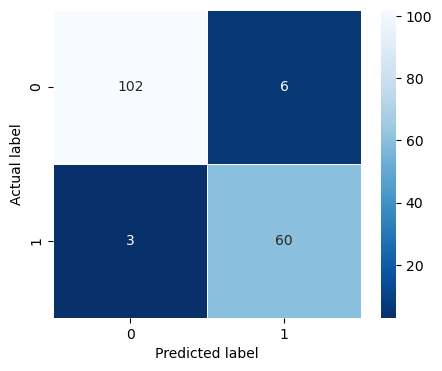

In [69]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy of Decision tree on test set after pruning : {accuracy :.2f}')
print(f'Recall of Decision tree on test set after pruning : {recall :.2f}')
print(f'precision score of Decision tree on test set after pruning : {precision :.2f}')
print(f'f1 score of Decision tree on test set after pruning : {f1 :.2f}')

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_mat,annot=True,fmt="d",linewidths=.5,square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')




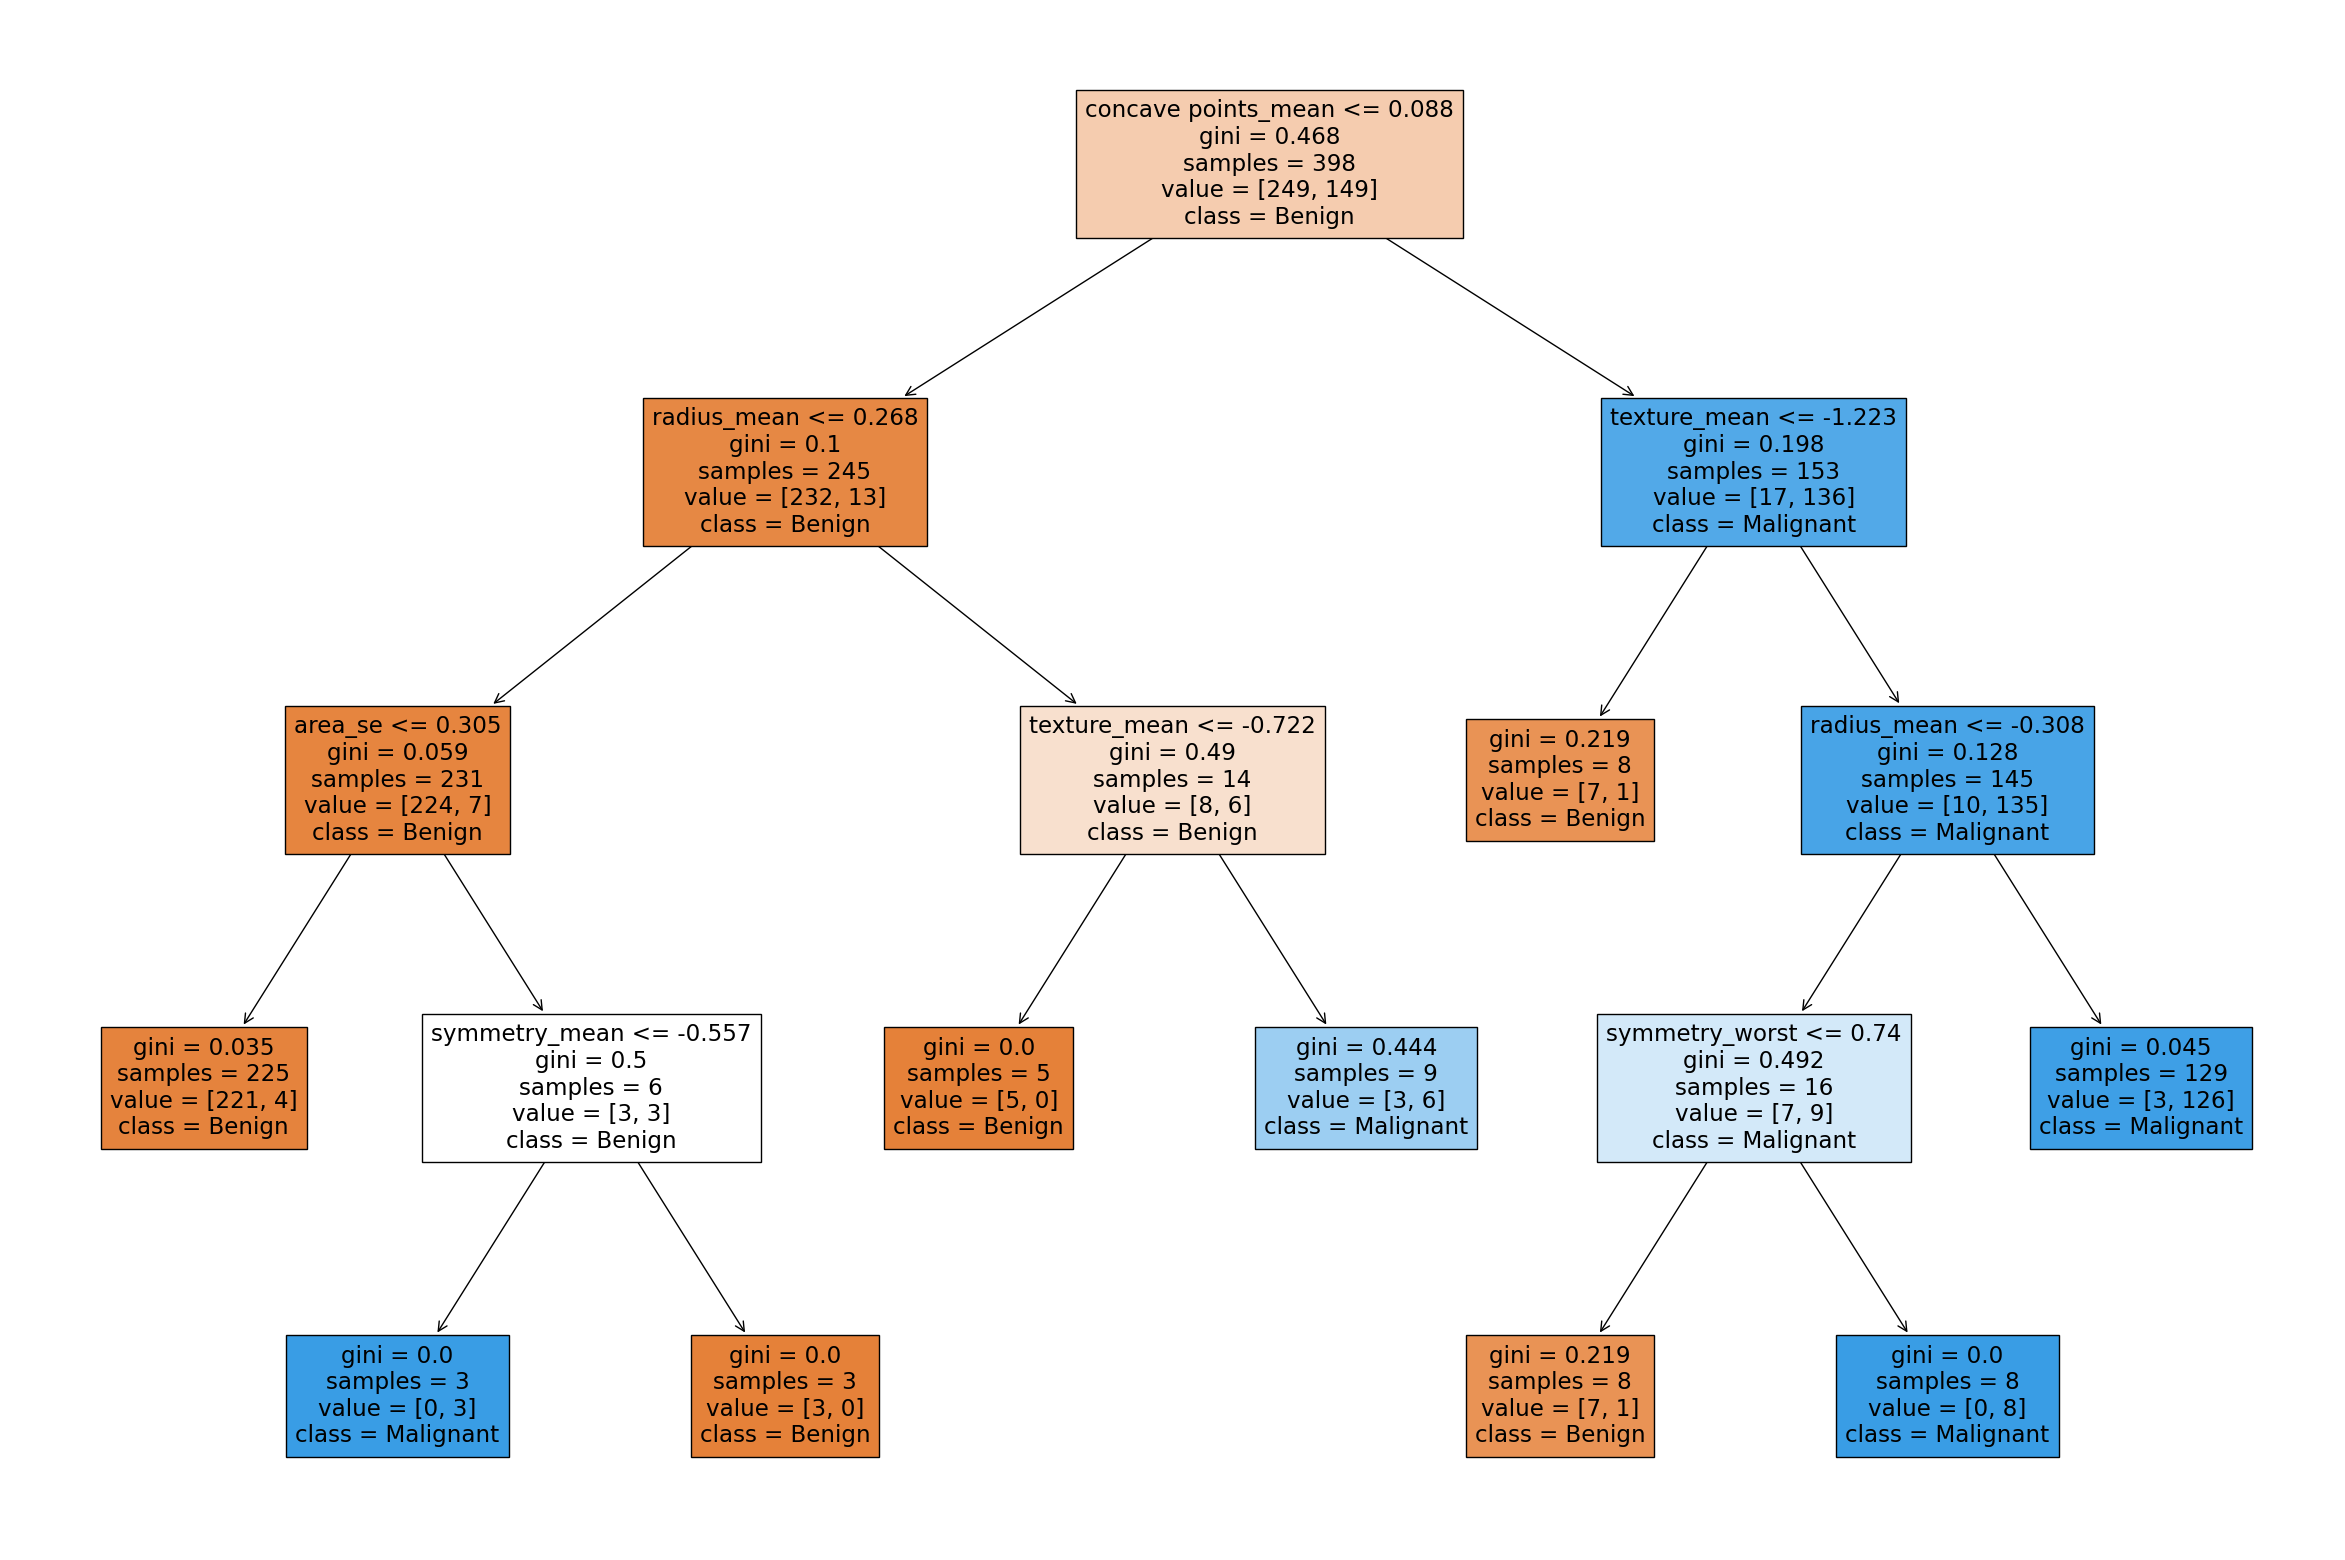

In [72]:
plt.figure(figsize=(30,20))
tree.plot_tree(Dec_tree_model,filled=True,feature_names=['radius_mean','texture_mean','smoothness_mean','compactness_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','texture_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','smoothness_worst','compactness_worst','symmetry_worst','fractal_dimension_worst','diagnosis_M'],class_names=['Benign','Malignant'])
plt.show()

# Random Forest

In [ ]:
#Random Forest using bootstrap
RF = RandomForestClassifier(
    n_estimators=10,
    max_depth = None,
    min_samples_split= 2,
    min_samples_leaf=1,
    max_features= 'sqrt',
    bootstrap=True,
    random_state=42
    )

param_grid = {
    'n_estimators' : [5,10,15,20,25],
    'max_depth' : [None,10,20],
    'min_samples_split': [2,5,8],
    'min_samples_leaf': [1,2,4,6],
    'max_features': ['sqrt','log2']
    }

grid_search = GridSearchCV(estimator=RF,param_grid=param_grid,cv=6,n_jobs=-1,verbose=2)

grid_search.fit(X_train,y_train)

print(f'Best parameters : {grid_search.best_params_}')

RF_model = grid_search.best_estimator_
y_pred = RF_model.predict(X_test)


Fitting 6 folds for each of 360 candidates, totalling 2160 fits
Best parameters : {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}


Accuracy of Random Forest on test set : 0.95
Recall of Random Forest on test set : 0.94
precision score of Random Forest on test set : 0.94
f1 score of Random Forest on test set : 0.94


Text(0.5, 14.722222222222216, 'Predicted label')

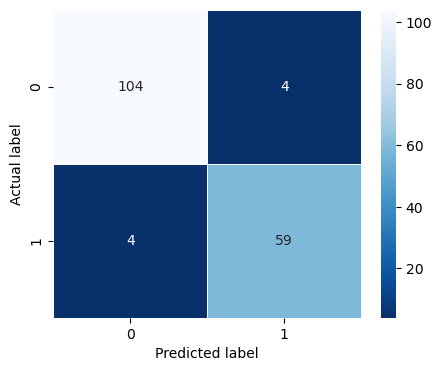

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy of Random Forest on test set : {accuracy :.2f}')
print(f'Recall of Random Forest on test set : {recall :.2f}')
print(f'precision score of Random Forest on test set : {precision :.2f}')
print(f'f1 score of Random Forest on test set : {f1 :.2f}')

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_mat,annot=True,fmt="d",linewidths=.5,square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
